In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import pandas as pd
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

## Actividad 1

[217.08438051  -1.33295826]


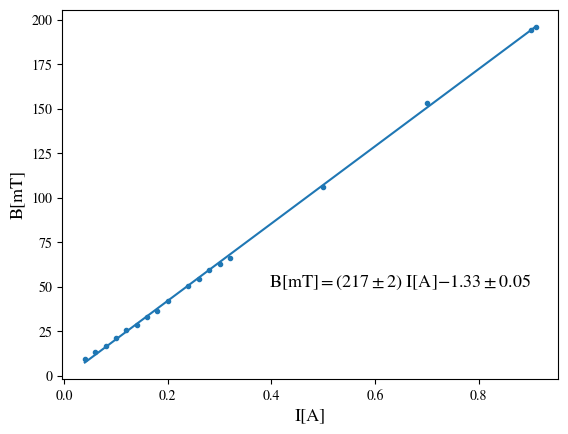

In [3]:
data_1=pd.read_excel('Actividad 1.xlsx')
I=data_1['I[A]']
B_exp=data_1['B[mT]']

def B(x,m,c):
  return m*x+c

param, cov=optimize.curve_fit(B,I,B_exp)
print(param)
incer=np.square(cov)
equation = R'B[mT]$=({:.0f}\pm{:.0f})$ I[A]${:.2f}\pm{:.2f}$'.format(param[0],incer[0][0],param[1],incer[1][1])

plt.figure()
plt.xlabel('I[A]',fontsize=13,color='black')
plt.ylabel('B[mT]',fontsize=13,color='black')
plt.scatter(I,B_exp,marker='.')
plt.plot(I,B(I,*param))
plt.text(0.9,50,equation,fontsize=13,color='black',horizontalalignment='right')

plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

## Actividad 2

Variando campo magnético como muestran las Figuras, los valores de R_H para el material p son, con su incertidumbre:
5.00e-03±4e-04
4.49e-03±1e-04
4.41e-03±8e-05
4.17e-03±5e-05
4.29e-03±4e-05
Variando campo magnético como muestran las Figuras, los valores de R_H para el material n son, con su incertidumbre:
-9.41e-03±8e-04
-6.51e-03±2e-04
-5.97e-03±1e-04
-5.74e-03±7e-05
-5.80e-03±6e-05
Variando la corriente I_p como muestran las Figuras, los valores de R_H para el material p son, con su incertidumbre:
4.48e-03±8e-04
4.74e-03±2e-04
5.75e-03±1e-04
3.91e-03±7e-05
4.06e-03±6e-05
Los valores de la conductividad para el material p en el mismo orden de las corrientes de las Figuras
55
52
42
62
60
Los valores de la movilidad de Hall para el material p en el mismo orden de las corrientes de las Figuras
0.247
0.247
0.242
0.243
0.244
Variando la corriente I_p como muestran las Figuras, los valores de R_H para el material n son, con su incertidumbre:
-5.77e-03±8e-04
-5.94e-03±2e-04
-4.43e-03±1e-04

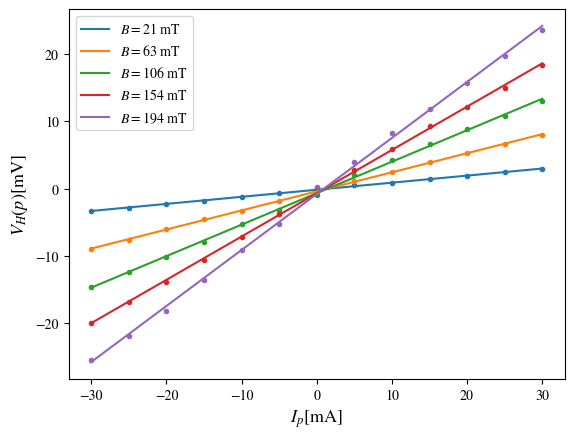

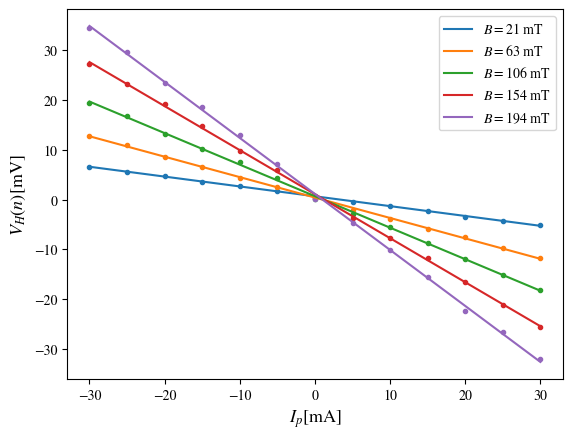

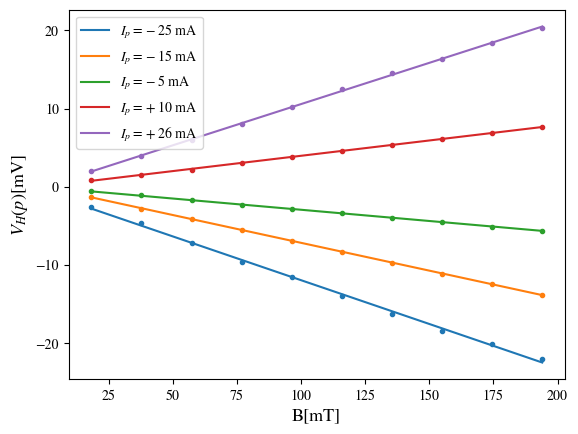

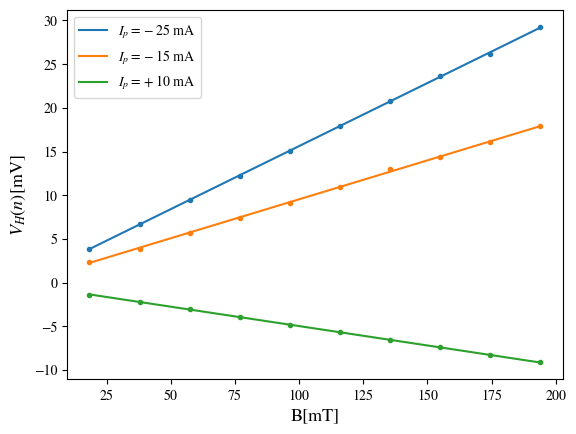

In [60]:
tipo=['p','n']
B_I=lambda x:217.08*x-1.33
def V_H(x,m,c):
    return m*x+c

for i in tipo:
    plt.figure()
    nombre = pd.ExcelFile(f'Actividad 2.1_{i}.xlsx').sheet_names
    R_H=[]
    inc_R_H=[]
    for hoja in nombre:
        data_2=pd.read_excel(f'Actividad 2.1_{i}.xlsx',sheet_name=hoja)
        I_p=data_2['I_p[mA]']
        V_H_exp=data_2['V_H[mV]']
        param, cov=optimize.curve_fit(V_H,I_p,V_H_exp)
        incer=np.square(cov)
        plt.scatter(I_p,V_H_exp,marker='.')
        plt.plot(I_p, I_p*param[0]+param[1],label=r'${}$ mT'.format(hoja[0:7]))
        plt.xlabel(r'$I_p$[mA]',fontsize=13)
        plt.ylabel(r'$V_H ({})$[mV]'.format(i),fontsize=13)
        plt.legend()
        plt.show
        R_H.append(param[0]/int(hoja[2:7]))
        inc_R_H.append(abs(param[0]/(int(hoja[2:7])+2)-param[0]/int(hoja[2:7])))
    print(f'Variando campo magnético como muestran las Figuras, los valores de R_H para el material {i} son, con su incertidumbre:')
    for i in range(len(R_H)):
        print('{:.2e}'.format(R_H[i])+'\u00B1{:.0e}'.format(inc_R_H[i]))
for i in tipo:
    plt.figure()
    nombre = pd.ExcelFile(f'Actividad 2.2_{i}.xlsx').sheet_names
    R_H=[]
    R_H_inc=[]
    sigma=[]
    mu=[]
    for hoja in nombre:
        data_2=pd.read_excel(f'Actividad 2.2_{i}.xlsx',sheet_name=hoja)
        B = B_I(data_2['I[A]'])
        V_H_exp = data_2['V_H[mV]']
        param, cov=optimize.curve_fit(V_H,B,V_H_exp)
        plt.scatter(B,V_H_exp,marker='.')
        plt.plot(B, B*param[0]+param[1],label=r'${}$ mA'.format(hoja[0:7]))
        plt.xlabel('B[mT]',fontsize=13)
        plt.ylabel(r'$V_H ({})$[mV]'.format(i),fontsize=13)
        plt.legend()
        plt.show
        R_H.append(param[0]/int(hoja[4:7]))
        R_H_inc.append(param[0]/int(hoja[4:7])-param[0]/(int(hoja[4:7])+1))
        sigma.append(abs(20*int(hoja[4:7])/(float(hoja[12::])*10)))
        mu.append(abs(param[0]/int(hoja[4:7]))*abs(20*int(hoja[4:7])/(float(hoja[12::])*10)))
    print(f'Variando la corriente I_p como muestran las Figuras, los valores de R_H para el material {i} son, con su incertidumbre:')
    for j in range(len(R_H)):
        print('{:.2e}'.format(R_H[j])+'\u00B1{:.0e}'.format(inc_R_H[j]))
    print(f'Los valores de la conductividad para el material {i} en el mismo orden de las corrientes de las Figuras')
    for j in range(len(sigma)):
       print('{:.0f}'.format(sigma[j]))
    
    print(f'Los valores de la movilidad de Hall para el material {i} en el mismo orden de las corrientes de las Figuras')
    for j in range(len(sigma)):
       print('{:.3f}'.format(mu[j]))

## Actividad 3

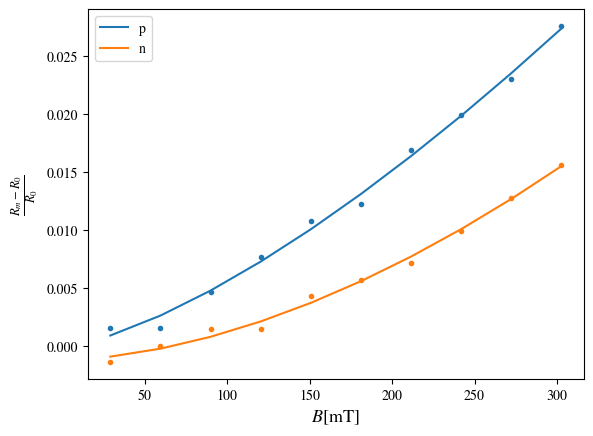

In [26]:
def R(x,a,b,e):
    return a*x**b+e
plt.figure()
nombre = pd.ExcelFile(f'Actividad 3.xlsx').sheet_names
R_0=[0.653/0.020,0.705/0.020]
for hoja in range(len(nombre)):
    data_3=pd.read_excel(f'Actividad 3.xlsx',sheet_name=nombre[hoja])
    B = B_I(data_3['I[A]'])
    V_l = np.abs(data_3['V_l[V]'].values)
    R_m=V_l/0.020
    R_exp=(R_m-R_0[hoja])/R_0[hoja]
    param, cov=optimize.curve_fit(R,B,R_exp)
    incer=np.square(cov)
    plt.scatter(B,R_exp,marker='.')
    plt.plot(B, R(B,*param),label=r'{}'.format(nombre[hoja]))
    plt.ylabel(r'$\frac{R_m-R_0}{R_0}$',fontsize=13)
    plt.xlabel('$B$[mT]'.format(i),fontsize=13)
    plt.legend()

## Actividad 4

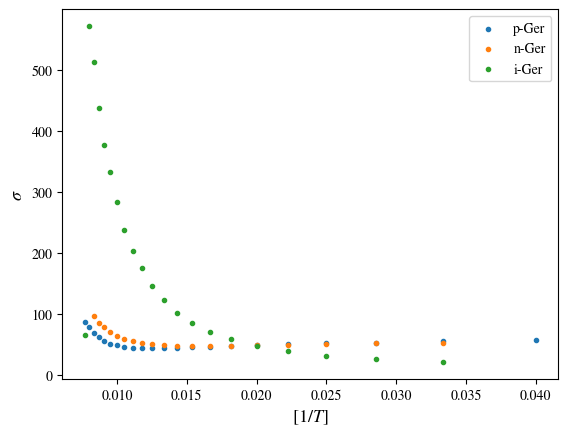

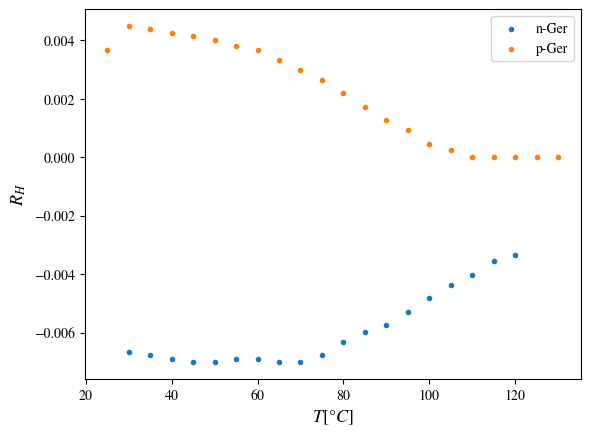

In [92]:
tipo=['p','n','i']
plt.figure()
for i in tipo: 
    nombre = pd.ExcelFile(f'Actividad 4_{i}.xlsx').sheet_names
    data_4=pd.read_excel(f'Actividad 4_{i}.xlsx',sheet_name=nombre[0])
    T=data_4['T(°C)'].values
    V_l=data_4['V_l(V)']
    T_inv=1/T
    sigma_1=(abs(20*int(nombre[0][4:6])/(V_l*10)))
    plt.scatter(T_inv,sigma_1,label=f'{i}-Ger',marker='.')
    plt.xlabel(r'$[1/T]$',fontsize=13,color='black')
    plt.ylabel(r'$\sigma$',fontsize=13,color='black')
    plt.legend()
tipo=['n','p']
plt.figure()
for i in tipo:
    nombre = pd.ExcelFile(f'Actividad 4_{i}.xlsx').sheet_names
    data_4_2=pd.read_excel(f'Actividad 4_{i}.xlsx',sheet_name=nombre[1])
    V_H=data_4_2['V_H(mV)']
    T=data_4_2['T(°C)'].values
    R_H=V_H/(float(nombre[1][4:6])*float(nombre[1][9::]))
    plt.scatter(T,R_H,marker='.',label=f'{i}-Ger')
    plt.xlabel(r'$T[°C]$',fontsize=13,color='black')
    plt.ylabel(r'$R_H$'.format(i),fontsize=13,color='black')
    plt.legend()